# Train Model
Using the training data and its permutations I tried to train the model to predict tags. I tried it out on real video footage after and realised that this model wasn't accurate because I didn't have enough examples of tags viewed at an angle.

In [1]:
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = 12, 8

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.13 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
IPython 5.3.0
OS Darwin 16.5.0 x86_64 i386 64bit
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.0
pandas 0.19.2
Fri Apr 28 11:06:26 2017 AEST

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
import sys
sys.path.append("../src")
from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.imshow(image, cmap = cm.Greys_r)

In [4]:
list_image_directory_paths = glob.glob('/Users/jacksimpson/Data/beeunique/output/Classified/*/')

class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    class_images_dict[image_class_name] = []
    
    for i, image_file in enumerate(glob.glob(image_directory_path + '*.png')):
        if i % 4 == 0:
            image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
            class_images_dict[image_class_name].append(image)

In [5]:
{k: len(class_images_dict[k]) for k in class_images_dict.keys()}

{'0': 1397,
 '1': 1396,
 '1_Note': 1433,
 '2': 1380,
 '2_Note': 1319,
 '3': 1469,
 '3_Lines': 1373,
 '4': 1385,
 '5': 1418,
 '6': 1331,
 '7': 1350,
 '8': 1345,
 'AA': 1419,
 'Ampersand': 1411,
 'Ankh': 1494,
 'Arrow_Hollow': 1560,
 'Arrow_Line': 1353,
 'Asterisk': 1424,
 'BB': 1310,
 'Circle_Cross': 1099,
 'Circle_Half': 1272,
 'Circle_Line': 1428,
 'DD': 1283,
 'Diamond': 1435,
 'Dot': 1495,
 'Dot_3_Lines': 1542,
 'EE': 1306,
 'GG': 1396,
 'HH': 1302,
 'Hash': 1433,
 'Heart': 1425,
 'JJ': 1434,
 'KK': 1226,
 'Leaf': 1497,
 'MM': 1540,
 'NN': 1433,
 'Necklace': 1493,
 'Omega': 1082,
 'PP': 2517,
 'Peace': 1336,
 'Pillars': 1444,
 'Plane': 1432,
 'Plant': 1413,
 'Power': 1426,
 'Queen': 2204,
 'Question_Mark': 1417,
 'RR': 1226,
 'Radioactive': 1456,
 'SS': 2083,
 'Scissors': 1275,
 'TT': 1127,
 'Tadpole': 1440,
 'Triangle': 1534,
 'Trident': 1448,
 'UU': 1354,
 'Umbrella': 1354,
 'VV': 1380,
 'XX': 1391,
 'ZZ': 1358,
 'a': 1384,
 'b': 1391,
 'e': 1378,
 'f': 1346,
 'g': 1370,
 'h': 140

In [6]:
X = []
image_class_names_index = 0
image_class_names = {}
y = []
for image_class in class_images_dict.keys():
    image_class_names[image_class_names_index] = image_class
    print('{} has {} images'.format(image_class, len(class_images_dict[image_class])))
    for im in class_images_dict[image_class]:
        generated_images = processing_pipeline(im)
        X.extend(generated_images)
        y.extend([image_class_names_index] * len(generated_images))
    image_class_names_index += 1

#del class_images_dict
X = np.array(X)
y = np.array(y)

Dot_3_Lines has 1542 images
RR has 1226 images
Queen has 2204 images
Leaf has 1497 images
ZZ has 1358 images
BB has 1310 images
DD has 1283 images
Peace has 1336 images
Pillars has 1444 images
HH has 1302 images
Ampersand has 1411 images
JJ has 1434 images
n has 1301 images
Arrow_Hollow has 1560 images
Circle_Cross has 1099 images
Plant has 1413 images
Diamond has 1435 images
Hash has 1433 images
NN has 1433 images
Ankh has 1494 images
Question_Mark has 1417 images
TT has 1127 images
Trident has 1448 images
Asterisk has 1424 images
UU has 1354 images
1 has 1396 images
0 has 1397 images
3 has 1469 images
2 has 1380 images
3_Lines has 1373 images
4 has 1385 images
7 has 1350 images
6 has 1331 images
5 has 1418 images
Omega has 1082 images
Umbrella has 1354 images
AA has 1419 images
SS has 2083 images
Circle_Line has 1428 images
Radioactive has 1456 images
w has 1407 images
Tadpole has 1440 images
EE has 1306 images
Circle_Half has 1272 images
PP has 2517 images
GG has 1396 images
XX has 

In [7]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((2153151, 28, 28), (2153151,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71])
RR


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
del X

((1722520, 28, 28), (1722520,), (430631, 28, 28), (430631,))


## Model

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [13]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [14]:
Y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [15]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape

(1722520, 28, 28, 1)

In [16]:
# convert data to float32 and normalize from 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
model = Sequential()
# input layer
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28))) # if theano backend
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(72, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

/usr/local/lib/python2.7/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
1722520/1722520 [==============================] - 1388s - loss: 1.3729 - acc: 0.5848  
Epoch 2/10
1722520/1722520 [==============================] - 1332s - loss: 0.8053 - acc: 0.7477  
Epoch 3/10
1722520/1722520 [==============================] - 1337s - loss: 0.7031 - acc: 0.7792  
Epoch 4/10
1722520/1722520 [==============================] - 1364s - loss: 0.6619 - acc: 0.7921  
Epoch 5/10
1722520/1722520 [==============================] - 1380s - loss: 0.6304 - acc: 0.8023  
Epoch 6/10
1722520/1722520 [==============================] - 1386s - loss: 0.6148 - acc: 0.8076  
Epoch 7/10
1722520/1722520 [==============================] - 1453s - loss: 0.6019 - acc: 0.8120  
Epoch 8/10
1722520/1722520 [==============================] - 1382s - loss: 0.5870 - acc: 0.8167  
Epoch 9/10
1722520/1722520 [==============================] - 1368s - loss: 0.5782 - acc: 0.8201  
Epoch 10/10
1722520/1722520 [==============================] - 1347s - loss: 0.5726 - acc: 0.8217  


In [17]:
from keras.models import load_model
model = load_model('model.h5')

In [18]:
score = model.evaluate(X_test, Y_test) #, verbose=0
score

430432/430631 [============================>.] - ETA: 0s

[0.078746303317248939, 0.983682085126245]

In [19]:
pc = model.predict_classes(X_test)

430368/430631 [============================>.] - ETA: 0s

51
Dot


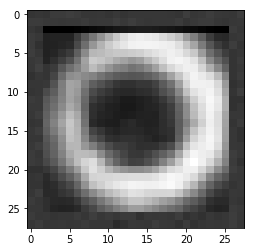

In [22]:
n = 1418
print(pc[n])
view(X_test[n].reshape(1, 28, 28)[0])
print(image_class_names[pc[n]])

11
JJ


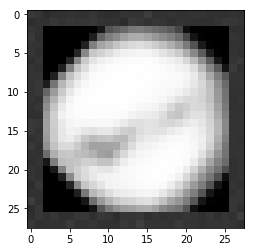

In [25]:
n = 0
print(pc[n])
view(X_test[n].reshape(1, 28, 28)[0])
print(image_class_names[pc[n]])

In [27]:
print(image_class_names)

{0: 'Dot_3_Lines', 1: 'RR', 2: 'Queen', 3: 'Leaf', 4: 'ZZ', 5: 'BB', 6: 'DD', 7: 'Peace', 8: 'Pillars', 9: 'HH', 10: 'Ampersand', 11: 'JJ', 12: 'n', 13: 'Arrow_Hollow', 14: 'Circle_Cross', 15: 'Plant', 16: 'Diamond', 17: 'Hash', 18: 'NN', 19: 'Ankh', 20: 'Question_Mark', 21: 'TT', 22: 'Trident', 23: 'Asterisk', 24: 'UU', 25: '1', 26: '0', 27: '3', 28: '2', 29: '3_Lines', 30: '4', 31: '7', 32: '6', 33: '5', 34: 'Omega', 35: 'Umbrella', 36: 'AA', 37: 'SS', 38: 'Circle_Line', 39: 'Radioactive', 40: 'w', 41: 'Tadpole', 42: 'EE', 43: 'Circle_Half', 44: 'PP', 45: 'GG', 46: 'XX', 47: 'VV', 48: '8', 49: 'Necklace', 50: 'Triangle', 51: 'Dot', 52: 'a', 53: 'Heart', 54: 'b', 55: 'e', 56: 'Power', 57: 'g', 58: 'f', 59: 'i', 60: 'h', 61: 'Arrow_Line', 62: 'j', 63: 'Plane', 64: '2_Note', 65: 'KK', 66: 'r', 67: 't', 68: '1_Note', 69: 'y', 70: 'Scissors', 71: 'MM'}


In [23]:
pp = model.predict_proba(X_test)
pp[0]

430624/430631 [============================>.] - ETA: 0s

array([  0.00000000e+00,   1.80779560e-19,   2.92195528e-26,
         4.05492501e-25,   3.01990919e-12,   3.81554759e-17,
         7.32246288e-33,   4.48077339e-13,   2.66263987e-21,
         5.39978408e-17,   1.15538894e-14,   6.79873586e-01,
         2.84422890e-16,   1.38582906e-22,   3.21927885e-34,
         2.76050489e-08,   3.54465288e-27,   4.15365612e-30,
         6.20124828e-13,   2.51191143e-30,   1.44056159e-07,
         1.49137239e-04,   4.26018207e-28,   0.00000000e+00,
         9.99470974e-30,   3.19932908e-01,   0.00000000e+00,
         3.72347436e-20,   3.17047489e-23,   7.66683596e-30,
         2.78610147e-23,   6.08283996e-12,   3.71665019e-19,
         7.18779503e-18,   3.71446012e-23,   1.97863635e-15,
         5.63079260e-13,   9.40974854e-10,   1.22679407e-21,
         1.63240911e-20,   0.00000000e+00,   1.86182977e-30,
         3.66488662e-09,   3.34174588e-16,   2.65577577e-11,
         1.30263831e-26,   4.50112777e-12,   1.07396248e-14,
         1.07806703e-14,

In [28]:
np.argmax(pp[0])
np.amax(pp[0])

0.67987359

In [91]:
predictions[0]

11

In [ ]:
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

In [15]:
model.save('model.h5')
#from keras.models import load_model
#model = load_model('model.h5')

In [ ]:


# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print ("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))